In [420]:
# Libraries
import os
import pandas as pd
import re as re
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium

# Docker only (setting the path using the environmental variable PROJ_LIB)
#if platform.system() == 'Linux':
#    import os
#    import conda
#    conda_file_dir = conda.__file__
#    conda_dir = conda_file_dir.split('lib')[0]
#    proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
#    os.environ["PROJ_LIB"] = proj_lib
#else:
#    pass

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [421]:
# Read Airbnb Data
airbnb = pd.read_csv('../data/airbnb_apartments_scraped_security_copy.csv',dtype='string')
airbnb.head(10)

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,list_ameneties
0,Serviced Studio Zürich City #B,44 CHF,<NA>,"Zürich, Schweiz",2 Gäste,1 Schlafzimmer,1 Bett,1 Badezimmer,47.40581,8.55173,36 Bewertungen,"4,28 ·",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,['Zum Übernachten optimal für eine Person.\nFü...,"['Grundausstattung', 'Heizung', 'WLAN', 'Arbei..."
1,2.5 Zimmerwohnung mit Garten,40 CHF,<NA>,"Uitikon, Zürich, Schweiz",2 Gäste,1 Schlafzimmer,1 Bett,1 Badezimmer,47.36336,8.46183,<NA>,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Seife oder Duschgel', 'Warmwasser', 'Waschma..."
2,Schönes Reihenhaus in Schlieren Altstiel.,48 CHF,<NA>,"Schlieren, Zürich, Schweiz",1 Gast,1 Schlafzimmer,1 Bett,1 Badezimmer,47.3951,8.4687,10 Bewertungen,"4,10 ·","4,7","4,4","4,7","4,6","4,0","4,6","['Hallo zusammen,\nHerr Borotti hatte mich tro...","['Blick in den Garten', 'Badewanne', 'Reinigun..."
3,Stadt Zürich15/ kleines Studio,62 CHF,<NA>,"Zürich, Schweiz",1 Gast,1 Schlafzimmer,1 Bett,1 Badezimmer,47.38157,8.48096,341 Bewertungen,"4,87 ·","4,8","4,7","5,0","4,9","4,9","4,9",['Appartement war an super lage und das zimmer...,"['Föhn', 'Shampoo', 'Warmwasser', 'Duschgel', ..."
4,Affoltern a.A. Dachwohnung/ Attic apartement,60 CHF,<NA>,"Affoltern am Albis, Zürich, Schweiz",3 Gäste,1 Schlafzimmer,2 Betten,1 Badezimmer,47.27565,8.45244,160 Bewertungen,"4,53 ·","4,6","4,7","4,9","4,8","4,3","4,8","['Alles reibungslos gelaufen!', 'Die Wohnung i...","['Föhn', 'Reinigungsprodukte', 'Shampoo', 'Sei..."
5,1stFloor Apartment with Mattress,70 CHF,<NA>,"Zollikon, Zürich, Schweiz",3 Gäste,2 Schlafzimmer,1 Bett,1 Badezimmer,47.3427,8.6054,<NA>,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Badewanne', 'Reinigungsprodukte', 'Warmwasse..."
6,Spannende Wohnung in Zürich Örlikon,62 CHF,<NA>,"Zürich, Schweiz",2 Gäste,Studio,1 Bett,1 Badezimmer,47.40388,8.54967,3 Bewertungen,"4,67 ·","5,0","5,0","5,0","5,0","4,7","5,0",['The house is perfectly connected to the cent...,"['Warmwasser', 'Waschmaschine', 'Trockner', 'G..."
7,Gemütliche Ferienwohnung bang im Zentrum von H...,59 CHF,53 CHF,"Horgen, Zürich, Schweiz",2 Gäste,1 Schlafzimmer,2 Betten,1 Badezimmer,47.26012,8.5973,40 Bewertungen,"4,65 ·","4,7","5,0","4,9","4,8","4,8","4,8","['So schön, unkompliziert und gemütlich - ich ...","['Seeblick', 'Warmwasser', 'Waschmaschine\xa0–..."
8,Geschätzt einfache Wohnung,66 CHF,<NA>,"Zürich, Schweiz",2 Gäste,1 Schlafzimmer,1 Bett,1 Badezimmer,47.4014,8.499,<NA>,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Badewanne', 'Föhn', 'Reinigungsprodukte', 'S..."
9,Wil ZH Zuhause mit Aussicht,62 CHF,<NA>,"Wil, Zürich, Schweiz",2 Gäste,Studio,1 Bett,1 Badezimmer,47.60506,8.50563,45 Bewertungen,"4,80 ·","4,7","4,7","5,0","4,9","4,9","4,8","['Sehr schönes Appartement, Wifi, gute Erkläru...","['Seife/Duschgel der Marke Palmolive', 'Warmwa..."


In [422]:
#check value types
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  960 non-null    string
 1   price                 948 non-null    string
 2   price_reduced         93 non-null     string
 3   place                 859 non-null    string
 4   guests                960 non-null    string
 5   bedrooms              960 non-null    string
 6   beds                  960 non-null    string
 7   bathrooms             949 non-null    string
 8   lat                   960 non-null    string
 9   lng                   960 non-null    string
 10  nr_of_ratings         641 non-null    string
 11  rating_overall        752 non-null    string
 12  rating_valueformoney  634 non-null    string
 13  rating_location       634 non-null    string
 14  rating_checkin        634 non-null    string
 15  rating_communication  634 non-null    st

In [423]:
airbnb.isnull().sum()

name                      0
price                    12
price_reduced           867
place                   101
guests                    0
bedrooms                  0
beds                      0
bathrooms                11
lat                       0
lng                       0
nr_of_ratings           319
rating_overall          208
rating_valueformoney    326
rating_location         326
rating_checkin          326
rating_communication    326
rating_cleanliness      326
rating_data_accuracy    326
comments                  0
list_ameneties            0
dtype: int64

In [424]:
# remove flats that have no price and no reduced_price
airbnb = airbnb[~((airbnb['price'] == '<NA>') & (airbnb['price_reduced'] == '<NA>'))]
airbnb.loc[airbnb['price'].isnull()]

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,list_ameneties


In [425]:
airbnb.isna().sum()

name                      0
price                     0
price_reduced           855
place                    99
guests                    0
bedrooms                  0
beds                      0
bathrooms                11
lat                       0
lng                       0
nr_of_ratings           307
rating_overall          206
rating_valueformoney    314
rating_location         314
rating_checkin          314
rating_communication    314
rating_cleanliness      314
rating_data_accuracy    314
comments                  0
list_ameneties            0
dtype: int64

In [426]:
# clean special case where bathrooms is in beds column
def update_bathroom_rows(df):
    def check_and_update(row):
        if row['beds'] == '1 Badezimmer' and row['guests'] == '2 Gäste':
            row['beds'] = '1'
            row['bathrooms'] = '1'
        return row

    return df.apply(check_and_update, axis=1)

airbnb = update_bathroom_rows(airbnb)

In [427]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 959
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  948 non-null    string
 1   price                 948 non-null    string
 2   price_reduced         93 non-null     string
 3   place                 849 non-null    string
 4   guests                948 non-null    string
 5   bedrooms              948 non-null    string
 6   beds                  948 non-null    string
 7   bathrooms             944 non-null    string
 8   lat                   948 non-null    string
 9   lng                   948 non-null    string
 10  nr_of_ratings         641 non-null    string
 11  rating_overall        742 non-null    string
 12  rating_valueformoney  634 non-null    string
 13  rating_location       634 non-null    string
 14  rating_checkin        634 non-null    string
 15  rating_communication  634 non-null    st

In [428]:
def remove_chf_and_spaces(text):
    text_without_chf = re.sub('CHF', '', str(text))
    text_without_spaces = re.sub('\s+', '', text_without_chf)
    return text_without_spaces

# function to replace <NA> by 0
def change_na_to_0(text: str):
    if str(text) == '<NA>':
        return '0'
    return str(text)

# remove ' CHF' from price
airbnb['price'] = airbnb['price'].apply(remove_chf_and_spaces)
# clean price_reduced
airbnb['price_reduced'] = airbnb['price_reduced'].apply(change_na_to_0)
airbnb['price_reduced'] = airbnb['price_reduced'].apply(remove_chf_and_spaces)
# change price cols to type float
airbnb['price'] = airbnb['price'].astype(float)
airbnb['price_reduced'] = airbnb['price_reduced'].astype(float)
airbnb.head()



,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,list_ameneties
0,Serviced Studio Zürich City #B,44.0,0.0,"Zürich, Schweiz",2 Gäste,1 Schlafzimmer,1 Bett,1 Badezimmer,47.40581,8.55173,36 Bewertungen,"4,28 ·",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,['Zum Übernachten optimal für eine Person.\nFü...,"['Grundausstattung', 'Heizung', 'WLAN', 'Arbei..."
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,"Uitikon, Zürich, Schweiz",2 Gäste,1 Schlafzimmer,1 Bett,1 Badezimmer,47.36336,8.46183,<NA>,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Seife oder Duschgel', 'Warmwasser', 'Waschma..."
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,"Schlieren, Zürich, Schweiz",1 Gast,1 Schlafzimmer,1 Bett,1 Badezimmer,47.3951,8.4687,10 Bewertungen,"4,10 ·","4,7","4,4","4,7","4,6","4,0","4,6","['Hallo zusammen,\nHerr Borotti hatte mich tro...","['Blick in den Garten', 'Badewanne', 'Reinigun..."
3,Stadt Zürich15/ kleines Studio,62.0,0.0,"Zürich, Schweiz",1 Gast,1 Schlafzimmer,1 Bett,1 Badezimmer,47.38157,8.48096,341 Bewertungen,"4,87 ·","4,8","4,7","5,0","4,9","4,9","4,9",['Appartement war an super lage und das zimmer...,"['Föhn', 'Shampoo', 'Warmwasser', 'Duschgel', ..."
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,"Affoltern am Albis, Zürich, Schweiz",3 Gäste,1 Schlafzimmer,2 Betten,1 Badezimmer,47.27565,8.45244,160 Bewertungen,"4,53 ·","4,6","4,7","4,9","4,8","4,3","4,8","['Alles reibungslos gelaufen!', 'Die Wohnung i...","['Föhn', 'Reinigungsprodukte', 'Shampoo', 'Sei..."


In [429]:
# function to only keep number and remove text

def remove_chars_keep_numbers(text):
    try:
        numbers_only = [char for char in str(text) if char.isdigit()]
        returnString = ''.join(numbers_only)
        if returnString == '':
            return '0'
        return ''.join(numbers_only)
    except:
        print('remove_chars_keep_numbers error: ' + str(text))
        return str(text)
    

In [430]:
# remove chars in guests column
airbnb['guests'] = airbnb['guests'].apply(remove_chars_keep_numbers)
airbnb['guests'] = airbnb['guests'].astype(int)
airbnb.head()

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,list_ameneties
0,Serviced Studio Zürich City #B,44.0,0.0,"Zürich, Schweiz",2,1 Schlafzimmer,1 Bett,1 Badezimmer,47.40581,8.55173,36 Bewertungen,"4,28 ·",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,['Zum Übernachten optimal für eine Person.\nFü...,"['Grundausstattung', 'Heizung', 'WLAN', 'Arbei..."
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,"Uitikon, Zürich, Schweiz",2,1 Schlafzimmer,1 Bett,1 Badezimmer,47.36336,8.46183,<NA>,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Seife oder Duschgel', 'Warmwasser', 'Waschma..."
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,"Schlieren, Zürich, Schweiz",1,1 Schlafzimmer,1 Bett,1 Badezimmer,47.3951,8.4687,10 Bewertungen,"4,10 ·","4,7","4,4","4,7","4,6","4,0","4,6","['Hallo zusammen,\nHerr Borotti hatte mich tro...","['Blick in den Garten', 'Badewanne', 'Reinigun..."
3,Stadt Zürich15/ kleines Studio,62.0,0.0,"Zürich, Schweiz",1,1 Schlafzimmer,1 Bett,1 Badezimmer,47.38157,8.48096,341 Bewertungen,"4,87 ·","4,8","4,7","5,0","4,9","4,9","4,9",['Appartement war an super lage und das zimmer...,"['Föhn', 'Shampoo', 'Warmwasser', 'Duschgel', ..."
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,"Affoltern am Albis, Zürich, Schweiz",3,1 Schlafzimmer,2 Betten,1 Badezimmer,47.27565,8.45244,160 Bewertungen,"4,53 ·","4,6","4,7","4,9","4,8","4,3","4,8","['Alles reibungslos gelaufen!', 'Die Wohnung i...","['Föhn', 'Reinigungsprodukte', 'Shampoo', 'Sei..."


# Set number of guests as number of rooms to be able to map to zurich rent data

In [431]:
airbnb['rooms'] = airbnb['guests']
airbnb['rooms'] = airbnb['guests'].astype(int)

In [432]:
def clean_bedroom_vals(text):
    if str(text) == 'Studio':
        return '1'
    if str(text) == '':
        return '0'
    # remove chars in bedrooms column
    return remove_chars_keep_numbers(str(text))

airbnb['bedrooms'] = airbnb['bedrooms'].apply(clean_bedroom_vals)
airbnb['bedrooms'] = airbnb['bedrooms'].astype(int)
airbnb.head(10)

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,...,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,list_ameneties,rooms
0,Serviced Studio Zürich City #B,44.0,0.0,"Zürich, Schweiz",2,1,1 Bett,1 Badezimmer,47.40581,8.55173,...,"4,28 ·",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,['Zum Übernachten optimal für eine Person.\nFü...,"['Grundausstattung', 'Heizung', 'WLAN', 'Arbei...",2
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,"Uitikon, Zürich, Schweiz",2,1,1 Bett,1 Badezimmer,47.36336,8.46183,...,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Seife oder Duschgel', 'Warmwasser', 'Waschma...",2
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,"Schlieren, Zürich, Schweiz",1,1,1 Bett,1 Badezimmer,47.3951,8.4687,...,"4,10 ·","4,7","4,4","4,7","4,6","4,0","4,6","['Hallo zusammen,\nHerr Borotti hatte mich tro...","['Blick in den Garten', 'Badewanne', 'Reinigun...",1
3,Stadt Zürich15/ kleines Studio,62.0,0.0,"Zürich, Schweiz",1,1,1 Bett,1 Badezimmer,47.38157,8.48096,...,"4,87 ·","4,8","4,7","5,0","4,9","4,9","4,9",['Appartement war an super lage und das zimmer...,"['Föhn', 'Shampoo', 'Warmwasser', 'Duschgel', ...",1
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,"Affoltern am Albis, Zürich, Schweiz",3,1,2 Betten,1 Badezimmer,47.27565,8.45244,...,"4,53 ·","4,6","4,7","4,9","4,8","4,3","4,8","['Alles reibungslos gelaufen!', 'Die Wohnung i...","['Föhn', 'Reinigungsprodukte', 'Shampoo', 'Sei...",3
5,1stFloor Apartment with Mattress,70.0,0.0,"Zollikon, Zürich, Schweiz",3,2,1 Bett,1 Badezimmer,47.3427,8.6054,...,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Badewanne', 'Reinigungsprodukte', 'Warmwasse...",3
6,Spannende Wohnung in Zürich Örlikon,62.0,0.0,"Zürich, Schweiz",2,1,1 Bett,1 Badezimmer,47.40388,8.54967,...,"4,67 ·","5,0","5,0","5,0","5,0","4,7","5,0",['The house is perfectly connected to the cent...,"['Warmwasser', 'Waschmaschine', 'Trockner', 'G...",2
7,Gemütliche Ferienwohnung bang im Zentrum von H...,59.0,53.0,"Horgen, Zürich, Schweiz",2,1,2 Betten,1 Badezimmer,47.26012,8.5973,...,"4,65 ·","4,7","5,0","4,9","4,8","4,8","4,8","['So schön, unkompliziert und gemütlich - ich ...","['Seeblick', 'Warmwasser', 'Waschmaschine\xa0–...",2
8,Geschätzt einfache Wohnung,66.0,0.0,"Zürich, Schweiz",2,1,1 Bett,1 Badezimmer,47.4014,8.499,...,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Badewanne', 'Föhn', 'Reinigungsprodukte', 'S...",2
9,Wil ZH Zuhause mit Aussicht,62.0,0.0,"Wil, Zürich, Schweiz",2,1,1 Bett,1 Badezimmer,47.60506,8.50563,...,"4,80 ·","4,7","4,7","5,0","4,9","4,9","4,8","['Sehr schönes Appartement, Wifi, gute Erkläru...","['Seife/Duschgel der Marke Palmolive', 'Warmwa...",2


In [433]:
# remove chars in beds column
airbnb['beds'] = airbnb['beds'].apply(remove_chars_keep_numbers)
airbnb['beds'] = airbnb['beds'].astype(int)

In [434]:
def clean_bathroom_vals(text):
    text = str(text)
    if text == '1 Badezimmer' or text == 'WC und Waschbecken':
        return '1'
    if text == '0 Badezimmer' or text == '':
        return '0'
    if text == '1,5 Bäder' or '1,5 Badezimmer':
        return '1.5'
    if text == '2 Badezimmer':
        return '2'
    if text == '2,5 Bäder' or '2,5 Badezimmer':
        return '2.5'
    if text == '3 Badezimmer':
        return '3'
    if text == '3,5 Bäder' or '3,5 Badezimmer':
        return '3.5'
    if text == '4 Badezimmer':
        return '4'
    if text == '4,5 Bäder' or '4,5 Badezimmer':
        return '4.5'
    if text == '5 Badezimmer':
        return '5'
    return text


# remove chars in bathrooms column
airbnb['bathrooms'].astype(str)
airbnb['bathrooms'] = airbnb['bathrooms'].apply(clean_bathroom_vals)
airbnb['bathrooms'] = airbnb['bathrooms'].astype(float)
airbnb.head()

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,...,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,list_ameneties,rooms
0,Serviced Studio Zürich City #B,44.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.40581,8.55173,...,"4,28 ·",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,['Zum Übernachten optimal für eine Person.\nFü...,"['Grundausstattung', 'Heizung', 'WLAN', 'Arbei...",2
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,"Uitikon, Zürich, Schweiz",2,1,1,1.0,47.36336,8.46183,...,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Seife oder Duschgel', 'Warmwasser', 'Waschma...",2
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,"Schlieren, Zürich, Schweiz",1,1,1,1.0,47.3951,8.4687,...,"4,10 ·","4,7","4,4","4,7","4,6","4,0","4,6","['Hallo zusammen,\nHerr Borotti hatte mich tro...","['Blick in den Garten', 'Badewanne', 'Reinigun...",1
3,Stadt Zürich15/ kleines Studio,62.0,0.0,"Zürich, Schweiz",1,1,1,1.0,47.38157,8.48096,...,"4,87 ·","4,8","4,7","5,0","4,9","4,9","4,9",['Appartement war an super lage und das zimmer...,"['Föhn', 'Shampoo', 'Warmwasser', 'Duschgel', ...",1
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,"Affoltern am Albis, Zürich, Schweiz",3,1,2,1.0,47.27565,8.45244,...,"4,53 ·","4,6","4,7","4,9","4,8","4,3","4,8","['Alles reibungslos gelaufen!', 'Die Wohnung i...","['Föhn', 'Reinigungsprodukte', 'Shampoo', 'Sei...",3


In [435]:
# remove chars in nr_of_ratings column
airbnb['nr_of_ratings'] = airbnb['nr_of_ratings'].apply(remove_chars_keep_numbers)
airbnb['nr_of_ratings'] = airbnb['nr_of_ratings'].astype(int)
airbnb.head()

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,...,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,list_ameneties,rooms
0,Serviced Studio Zürich City #B,44.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.40581,8.55173,...,"4,28 ·",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,['Zum Übernachten optimal für eine Person.\nFü...,"['Grundausstattung', 'Heizung', 'WLAN', 'Arbei...",2
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,"Uitikon, Zürich, Schweiz",2,1,1,1.0,47.36336,8.46183,...,Neu,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],"['Seife oder Duschgel', 'Warmwasser', 'Waschma...",2
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,"Schlieren, Zürich, Schweiz",1,1,1,1.0,47.3951,8.4687,...,"4,10 ·","4,7","4,4","4,7","4,6","4,0","4,6","['Hallo zusammen,\nHerr Borotti hatte mich tro...","['Blick in den Garten', 'Badewanne', 'Reinigun...",1
3,Stadt Zürich15/ kleines Studio,62.0,0.0,"Zürich, Schweiz",1,1,1,1.0,47.38157,8.48096,...,"4,87 ·","4,8","4,7","5,0","4,9","4,9","4,9",['Appartement war an super lage und das zimmer...,"['Föhn', 'Shampoo', 'Warmwasser', 'Duschgel', ...",1
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,"Affoltern am Albis, Zürich, Schweiz",3,1,2,1.0,47.27565,8.45244,...,"4,53 ·","4,6","4,7","4,9","4,8","4,3","4,8","['Alles reibungslos gelaufen!', 'Die Wohnung i...","['Föhn', 'Reinigungsprodukte', 'Shampoo', 'Sei...",3


In [436]:
airbnb['lat'] = airbnb['lat'].astype(float)
airbnb['lng'] = airbnb['lng'].astype(float)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 959
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  948 non-null    string 
 1   price                 948 non-null    float64
 2   price_reduced         948 non-null    float64
 3   place                 849 non-null    string 
 4   guests                948 non-null    int64  
 5   bedrooms              948 non-null    int64  
 6   beds                  948 non-null    int64  
 7   bathrooms             948 non-null    float64
 8   lat                   948 non-null    float64
 9   lng                   948 non-null    float64
 10  nr_of_ratings         948 non-null    int64  
 11  rating_overall        742 non-null    string 
 12  rating_valueformoney  634 non-null    string 
 13  rating_location       634 non-null    string 
 14  rating_checkin        634 non-null    string 
 15  rating_communication  6

In [437]:
# check if some rows don't have coordinates
count = len(airbnb[(airbnb['lat'] == 0.0) | (airbnb['lng'] == 0.0)])
print(f"Number of rows with either lat or lng equal to 0.0: {count}")

Number of rows with either lat or lng equal to 0.0: 3


In [438]:
# Remove rows where both 'lat' and 'lng' are 0.0
airbnb = airbnb[(airbnb['lat'] != 0.0) | (airbnb['lng'] != 0.0)]

In [439]:
# replace <NA> by 0
airbnb['rating_overall'] = airbnb['rating_overall'].apply(change_na_to_0)
# Set all sub-ratings to 5.0 if rating_overall is "Superhost"
def update_superhost_rows(df):
    def check_and_update(row):
        if row['rating_overall'] == 'Superhost':
            row['rating_overall'] = '5'
            row['rating_valueformoney'] = '5'
            row['rating_location'] = '5'
            row['rating_checkin'] = '5'
            row['rating_communication'] = '5'
            row['rating_cleanliness'] = '5'
            row['rating_data_accuracy'] = '5'
        return row

    return df.apply(check_and_update, axis=1)

airbnb = update_superhost_rows(airbnb)

# Convert 'Neu' to zero and remove ' ·' from rating
def clean_rating_overall(text: str):
    if str(text) == 'Neu' or str(text) == '':
        return '0'
    return str(text).replace(' ·', '').replace(',','.')

# rating_overall
airbnb['rating_overall'] = airbnb['rating_overall'].apply(clean_rating_overall)
airbnb['rating_overall'] = airbnb['rating_overall'].astype(float)
#rating_valueformoney
airbnb['rating_valueformoney'] = airbnb['rating_valueformoney'].apply(change_na_to_0)
airbnb['rating_valueformoney'] = airbnb['rating_valueformoney'].apply(clean_rating_overall)
airbnb['rating_valueformoney'] = airbnb['rating_valueformoney'].astype(float)
#rating_location
airbnb['rating_location'] = airbnb['rating_location'].apply(change_na_to_0)
airbnb['rating_location'] = airbnb['rating_location'].apply(clean_rating_overall)
airbnb['rating_location'] = airbnb['rating_location'].astype(float)
#rating_checkin
airbnb['rating_checkin'] = airbnb['rating_checkin'].apply(change_na_to_0)
airbnb['rating_checkin'] = airbnb['rating_checkin'].apply(clean_rating_overall)
airbnb['rating_checkin'] = airbnb['rating_checkin'].astype(float)
#rating_communication
airbnb['rating_communication'] = airbnb['rating_communication'].apply(change_na_to_0)
airbnb['rating_communication'] = airbnb['rating_communication'].apply(clean_rating_overall)
airbnb['rating_communication'] = airbnb['rating_communication'].astype(float)
#rating_cleanliness
airbnb['rating_cleanliness'] = airbnb['rating_cleanliness'].apply(change_na_to_0)
airbnb['rating_cleanliness'] = airbnb['rating_cleanliness'].apply(clean_rating_overall)
airbnb['rating_cleanliness'] = airbnb['rating_cleanliness'].astype(float)
#rating_data_accuracy
airbnb['rating_data_accuracy'] = airbnb['rating_data_accuracy'].apply(change_na_to_0)
airbnb['rating_data_accuracy'] = airbnb['rating_data_accuracy'].apply(clean_rating_overall)
airbnb['rating_data_accuracy'] = airbnb['rating_data_accuracy'].astype(float)
airbnb.head()

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,...,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,list_ameneties,rooms
0,Serviced Studio Zürich City #B,44.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.40581,8.55173,...,4.28,0.0,0.0,0.0,0.0,0.0,0.0,['Zum Übernachten optimal für eine Person.\nFü...,"['Grundausstattung', 'Heizung', 'WLAN', 'Arbei...",2
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,"Uitikon, Zürich, Schweiz",2,1,1,1.0,47.36336,8.46183,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,[],"['Seife oder Duschgel', 'Warmwasser', 'Waschma...",2
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,"Schlieren, Zürich, Schweiz",1,1,1,1.0,47.39510,8.46870,...,4.10,4.7,4.4,4.7,4.6,4.0,4.6,"['Hallo zusammen,\nHerr Borotti hatte mich tro...","['Blick in den Garten', 'Badewanne', 'Reinigun...",1
3,Stadt Zürich15/ kleines Studio,62.0,0.0,"Zürich, Schweiz",1,1,1,1.0,47.38157,8.48096,...,4.87,4.8,4.7,5.0,4.9,4.9,4.9,['Appartement war an super lage und das zimmer...,"['Föhn', 'Shampoo', 'Warmwasser', 'Duschgel', ...",1
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,"Affoltern am Albis, Zürich, Schweiz",3,1,2,1.0,47.27565,8.45244,...,4.53,4.6,4.7,4.9,4.8,4.3,4.8,"['Alles reibungslos gelaufen!', 'Die Wohnung i...","['Föhn', 'Reinigungsprodukte', 'Shampoo', 'Sei...",3


In [440]:
# clean comments
#todo: implement (noch offen was wir hier genau machen wollen)

In [441]:
# clean ammeneties
#todo: split ameneties into new dataframe
# analyze which amaneties are the most common
# only use those most common ameneties (maybe top 20?)

def extract_amenities(amenity: str):
    allAmenities = []
    amenity = amenity.replace('[', '').replace(']', '')
    amenityArr = amenity.split(',')
    for a in range(len(amenityArr)):
        if a not in allAmenities:
            allAmenities.append(amenityArr[a].replace('\'','').strip())
    return allAmenities

def add_features(df, string_array):
    row_data = {}
    for feature in string_array:
        row_data[feature] = 1
    
    return df.append(row_data, ignore_index=True)

amenitiesDf = pd.DataFrame()
for index, row in airbnb.iterrows():
    amenities = literal_eval(row['list_ameneties'])
    amenitiesDf = add_features(amenitiesDf, amenities)
    #print(literal_eval(row['list_ameneties']))
    #newRow = {'id':index}
    #amenities.append(newRow)
    #for a in range(len(amenities)):
    #    amenitiesDf['price'] = amenitiesDf.get('price', 100)
     #   row = amenitiesDf.loc[amenitiesDf['id'] == index]
     #   row
amenitiesDf.head()

    


,Grundausstattung,Heizung,WLAN,Arbeitsplatz,Kühlschrank,Eigenständiger Check-in,Schlüsselbox,Seife oder Duschgel,Warmwasser,Waschmaschine,...,Babyfon – auf Anfrage verfügbar,Schnelle WLAN-Verbindung – 400 Mbit/s.,"55-Zoll-HDTV mit Apple TV, Chromecast, Netflix, Normaler Kabelanschluss",Schnelle WLAN-Verbindung – 409 Mbit/s.,Kühlschrank von Miele,Doppelofen von Miele aus Edelstahl,"Kaffeemaschine: Espressomaschine, Nespresso-Maschine, Pour-Over-Filterkaffeebereiter","Privater Grill: Elektrisch, Gas","Privater Whirlpool – ganzjährig verfügbar, rund um die uhr geöffnet",Kostenpflichtiges Parkhaus auf dem Grundstück – 25 Stellplätze
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


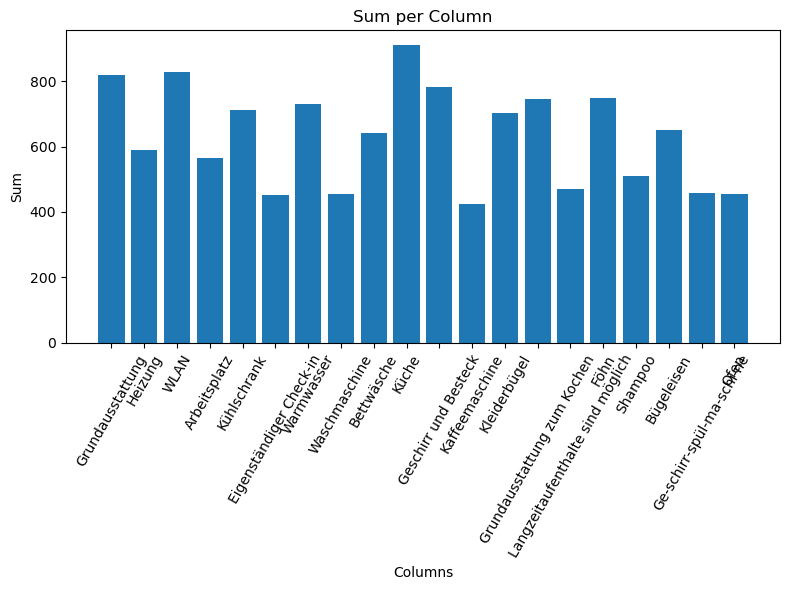

In [442]:
# remove NaN from Amenities DF
#amenitiesDf['Heizung'] = amenitiesDf['Heizung'].astype(int)
def replace_float_nan_with_zero(df):
    return df.applymap(lambda x: 0 if pd.isna(x) and isinstance(x, float) else x)
updated_df = replace_float_nan_with_zero(amenitiesDf)


# Get the sum of each column
column_sums = updated_df.sum()
filtered_column_sums = column_sums[column_sums > 400]

# Create a bar chart for the column sums
plt.figure(figsize=(8, 6))
plt.bar(filtered_column_sums.index, filtered_column_sums.values)
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum per Column')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

The amenities are not well documented on Airbnb. Since there are no guidelines, every person adds different amenities. Just the fact that, according to the data, only about half of the flats have a heater. Therefore this data cannot be used for the model training and will be disposed of.

In [443]:
airbnb.drop('list_ameneties', inplace=True, axis=1)
airbnb.head()

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,rooms
0,Serviced Studio Zürich City #B,44.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.40581,8.55173,36,4.28,0.0,0.0,0.0,0.0,0.0,0.0,['Zum Übernachten optimal für eine Person.\nFü...,2
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,"Uitikon, Zürich, Schweiz",2,1,1,1.0,47.36336,8.46183,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,[],2
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,"Schlieren, Zürich, Schweiz",1,1,1,1.0,47.39510,8.46870,10,4.10,4.7,4.4,4.7,4.6,4.0,4.6,"['Hallo zusammen,\nHerr Borotti hatte mich tro...",1
3,Stadt Zürich15/ kleines Studio,62.0,0.0,"Zürich, Schweiz",1,1,1,1.0,47.38157,8.48096,341,4.87,4.8,4.7,5.0,4.9,4.9,4.9,['Appartement war an super lage und das zimmer...,1
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,"Affoltern am Albis, Zürich, Schweiz",3,1,2,1.0,47.27565,8.45244,160,4.53,4.6,4.7,4.9,4.8,4.3,4.8,"['Alles reibungslos gelaufen!', 'Die Wohnung i...",3


                                                  name  price  price_reduced  \
922    Luxury Villa close to Zürich /View/Sauna/Garden  956.0          574.0   
928  Künstlerische Villa| 180° Seeblick | 12 min ZH...  863.0          685.0   
937  Friedliches Seehaus mit privatem Garten und Zu...  750.0            0.0   
955           Tilia Appartementhaus (max. 14 Personen)  836.0          754.0   

                           place  guests  bedrooms  beds  bathrooms       lat  \
922   Dättlikon, Zürich, Schweiz      12         5     8        1.5  47.52588   
928  Rüschlikon, Zürich, Schweiz      14         7     7        1.5  47.31168   
937     Uerikon, Zürich, Schweiz       6         3     4        1.5  47.23381   
955       Uster, Zürich, Schweiz      12         7    10        1.5  47.34850   

         lng  nr_of_ratings  rating_overall  rating_valueformoney  \
922  8.62215             16            4.88                   4.6   
928  8.54997              0            0.00            

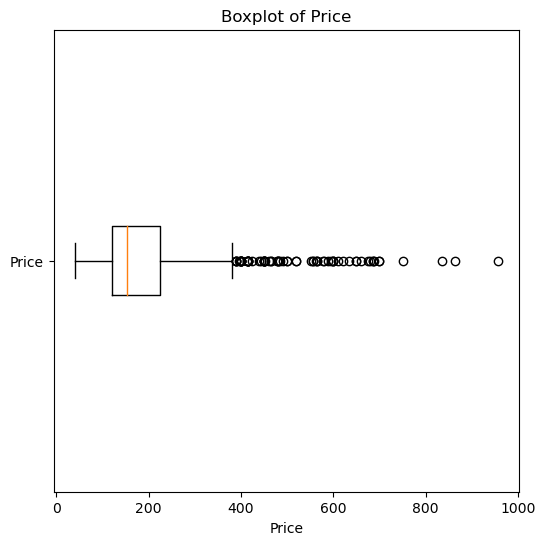

In [444]:
print(airbnb[airbnb['price'] > 700])
# Create a boxplot for the 'price' column
plt.figure(figsize=(6, 6))
plt.boxplot(airbnb['price'], vert=False)

# Customize the chart
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.yticks([1], ['Price'])

# Display the chart
plt.show()


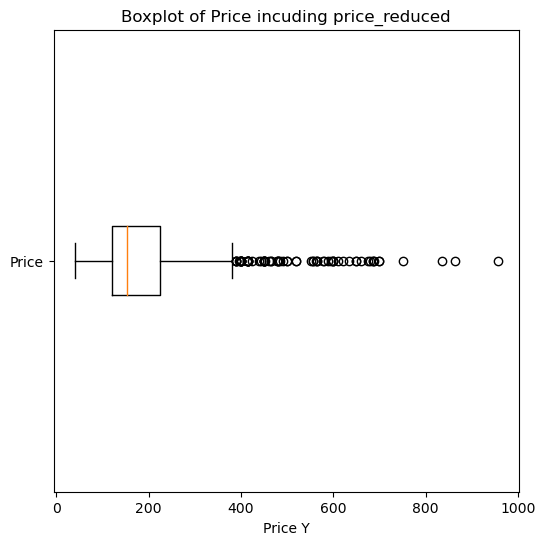

In [445]:
# check the boxplot for the flats with reduced prices as well
# price Y will be the target price in the model
airbnb.loc[airbnb['price_reduced'] == 0, 'price_y'] = airbnb['price_reduced']
airbnb.loc[airbnb['price_reduced'] > 0, 'price_y'] = airbnb['price_reduced']
plt.figure(figsize=(6, 6))
plt.boxplot(airbnb['price'], vert=False)

# Customize the chart
plt.xlabel('Price Y')
plt.title('Boxplot of Price incuding price_reduced')
plt.yticks([1], ['Price'])

# Display the chart
plt.show()

## Attention: If model does not perform well, we could drop some of the outliers shown in the boxplot.

# Correlation matrix

In [446]:
airbnb.corr()

,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,rooms,price_y
price,1.000000,0.350536,0.554158,0.543570,0.381202,0.405328,-0.078449,0.045510,-0.059552,-0.001860,-0.004504,-0.000589,-0.003713,-0.003583,0.005928,-0.002326,0.554158,0.350536
price_reduced,0.350536,1.000000,0.278651,0.305462,0.218979,0.112700,-0.005770,0.094798,-0.001341,0.037484,0.034376,0.040408,0.038394,0.042330,0.037843,0.041648,0.278651,1.000000
guests,0.554158,0.278651,1.000000,0.792517,0.697636,0.463835,-0.042833,0.133957,0.112344,0.067776,0.067487,0.066880,0.073005,0.068985,0.069743,0.069448,1.000000,0.278651
bedrooms,0.543570,0.305462,0.792517,1.000000,0.673864,0.517803,-0.057601,0.151970,-0.010980,-0.007125,-0.005881,-0.008385,-0.004864,-0.005622,-0.002762,-0.005665,0.792517,0.305462
beds,0.381202,0.218979,0.697636,0.673864,1.000000,0.406004,-0.027961,0.114243,0.063366,0.037292,0.038249,0.036548,0.041245,0.039013,0.036883,0.037966,0.697636,0.218979
bathrooms,0.405328,0.112700,0.463835,0.517803,0.406004,1.000000,-0.023316,0.066344,-0.072465,-0.013067,-0.014554,-0.019439,-0.016424,-0.017837,-0.011316,-0.016540,0.463835,0.112700
lat,-0.078449,-0.005770,-0.042833,-0.057601,-0.027961,-0.023316,1.000000,-0.164189,0.001331,0.054721,0.051073,0.041560,0.047979,0.048049,0.049382,0.049987,-0.042833,-0.005770
lng,0.045510,0.094798,0.133957,0.151970,0.114243,0.066344,-0.164189,1.000000,-0.048320,0.105188,0.099394,0.102846,0.099757,0.103902,0.101181,0.101077,0.133957,0.094798
nr_of_ratings,-0.059552,-0.001341,0.112344,-0.010980,0.063366,-0.072465,0.001331,-0.048320,1.000000,0.334974,0.321929,0.322534,0.322312,0.319855,0.320887,0.323383,0.112344,-0.001341
rating_overall,-0.001860,0.037484,0.067776,-0.007125,0.037292,-0.013067,0.054721,0.105188,0.334974,1.000000,0.980428,0.979044,0.979540,0.979519,0.980313,0.981003,0.067776,0.037484


In [447]:
airbnb.describe()

,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,rooms,price_y
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,194.056085,18.815873,3.406349,1.503704,2.003175,1.124868,47.372778,8.543883,33.024339,3.298836,3.173651,3.292275,3.342751,3.330370,3.273651,3.300529,3.406349,18.815873
std,123.383557,71.215536,1.820889,0.887911,1.636770,0.220183,0.051130,0.061901,64.059827,2.206386,2.162149,2.236990,2.268589,2.261261,2.228165,2.243316,1.820889,71.215536
min,40.000000,0.000000,1.000000,1.000000,1.000000,0.000000,47.143500,8.170200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,120.000000,0.000000,2.000000,1.000000,1.000000,1.000000,47.359990,8.518410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,153.000000,0.000000,3.000000,1.000000,2.000000,1.000000,47.374750,8.539900,8.000000,4.670000,4.500000,4.700000,4.800000,4.800000,4.700000,4.700000,3.000000,0.000000
75%,225.000000,0.000000,4.000000,2.000000,2.000000,1.500000,47.390660,8.555420,32.000000,4.900000,4.800000,4.900000,5.000000,5.000000,4.900000,4.900000,4.000000,0.000000
max,956.000000,754.000000,16.000000,7.000000,25.000000,1.500000,47.605060,8.915820,547.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,16.000000,754.000000


# Check for duplicates

In [448]:
airbnb.duplicated().any()

True

In [449]:
airbnb[airbnb['name'].duplicated() == True]

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,...,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,rooms,price_y
136,Gemütliche Wohnung in Zürich,89.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.38874,8.49727,...,5.00,4.9,4.9,4.9,5.0,4.8,4.9,['Die Wohnung von Blandine war wirklich wunder...,2,0.0
160,Zürich City,95.0,0.0,<NA>,2,1,1,1.0,47.38270,8.53326,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,[],2,0.0
232,Easy Studio,100.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.41890,8.50810,...,4.50,4.6,4.5,5.0,4.9,4.9,4.7,['Der Vorteil der Wohnung ist die gute Lage mi...,2,0.0
234,Easy Studio,100.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.42290,8.51470,...,4.80,4.8,4.6,5.0,5.0,5.0,4.2,"['Muy cómodo el apartamento, la relación con e...",2,0.0
243,Easy Studio,100.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.41890,8.50810,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,"['Sauber, gute Lage mit ausgezeichneter Anbind...",2,0.0
249,Easy Studio Apartment,100.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.41890,8.50810,...,5.00,5.0,5.0,5.0,5.0,5.0,5.0,[],2,0.0
250,Easy Studio,100.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.41890,8.50810,...,5.00,5.0,5.0,5.0,5.0,5.0,5.0,[],2,0.0
251,Easy Studio,100.0,0.0,"Zürich, Schweiz",2,1,1,1.0,47.41890,8.50810,...,5.00,5.0,5.0,5.0,5.0,5.0,5.0,[],2,0.0
290,CleverUnitZurich,148.0,0.0,"Zürich, Schweiz",3,1,2,1.0,47.38283,8.53293,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,['Die Wohnung ist sehr charmant und wie im Ins...,3,0.0
328,Modern eingerichtetes serviced Apartment,149.0,0.0,<NA>,3,1,1,1.0,47.33050,8.51640,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,[],3,0.0


In [450]:
# Drop rows with duplicate 'name' values
airbnb = airbnb.drop_duplicates(subset='name')

In [451]:
airbnb[airbnb['name'].duplicated() == True]

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,...,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,rooms,price_y


In [452]:
airbnb[airbnb['place'].isna() == True]

,name,price,price_reduced,place,guests,bedrooms,beds,bathrooms,lat,lng,...,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,rooms,price_y
16,Studio-Wohnung in Wiedikon Zürich,73.0,0.0,NaN,2,1,1,1.0,47.37140,8.51115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],2,0.0
81,1.5 Zimmer Wohnung in Zürich (BE-12),74.0,0.0,NaN,2,1,1,1.0,47.37500,8.51580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],2,0.0
91,Wunderschöner Ausblick nähe Zürich,76.0,0.0,NaN,3,1,1,1.0,47.42070,8.37020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],3,0.0
144,Gemütliches Studio in der Nähe der Stadt,110.0,99.0,NaN,2,1,1,1.0,47.36154,8.51822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],2,99.0
153,Zürich City,95.0,0.0,NaN,2,1,1,1.0,47.38270,8.53326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,Luxus-Apartment im Zentrum,287.0,0.0,NaN,5,2,2,1.5,47.39435,8.48435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],5,0.0
945,160m2 Luxus-Unterkunft eigenem Privat Spa,685.0,0.0,NaN,2,1,1,1.0,47.36620,8.36410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],2,0.0
951,Unterkunft mit 4 Schlafzimmern in der Nähe von...,480.0,0.0,NaN,6,4,5,1.5,47.35510,8.50780,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],6,0.0
954,Wohlfühloase direkt bei ZH,450.0,0.0,NaN,4,2,1,1.5,47.45182,8.32981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[],4,0.0


In [453]:
# remove column place because it's not needed and contains irrelevant data
airbnb.drop('place', axis=1, inplace=True)
airbnb.head()

,name,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,rating_overall,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,rooms,price_y
0,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,4.28,0.0,0.0,0.0,0.0,0.0,0.0,['Zum Übernachten optimal für eine Person.\nFü...,2,0.0
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,2,1,1,1.0,47.36336,8.46183,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,[],2,0.0
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,1,1,1,1.0,47.39510,8.46870,10,4.10,4.7,4.4,4.7,4.6,4.0,4.6,"['Hallo zusammen,\nHerr Borotti hatte mich tro...",1,0.0
3,Stadt Zürich15/ kleines Studio,62.0,0.0,1,1,1,1.0,47.38157,8.48096,341,4.87,4.8,4.7,5.0,4.9,4.9,4.9,['Appartement war an super lage und das zimmer...,1,0.0
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,3,1,2,1.0,47.27565,8.45244,160,4.53,4.6,4.7,4.9,4.8,4.3,4.8,"['Alles reibungslos gelaufen!', 'Die Wohnung i...",3,0.0


In [454]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 959
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  917 non-null    object 
 1   price                 917 non-null    float64
 2   price_reduced         917 non-null    float64
 3   guests                917 non-null    int64  
 4   bedrooms              917 non-null    int64  
 5   beds                  917 non-null    int64  
 6   bathrooms             917 non-null    float64
 7   lat                   917 non-null    float64
 8   lng                   917 non-null    float64
 9   nr_of_ratings         917 non-null    int64  
 10  rating_overall        917 non-null    float64
 11  rating_valueformoney  917 non-null    float64
 12  rating_location       917 non-null    float64
 13  rating_checkin        917 non-null    float64
 14  rating_communication  917 non-null    float64
 15  rating_cleanliness    9

# Heat map

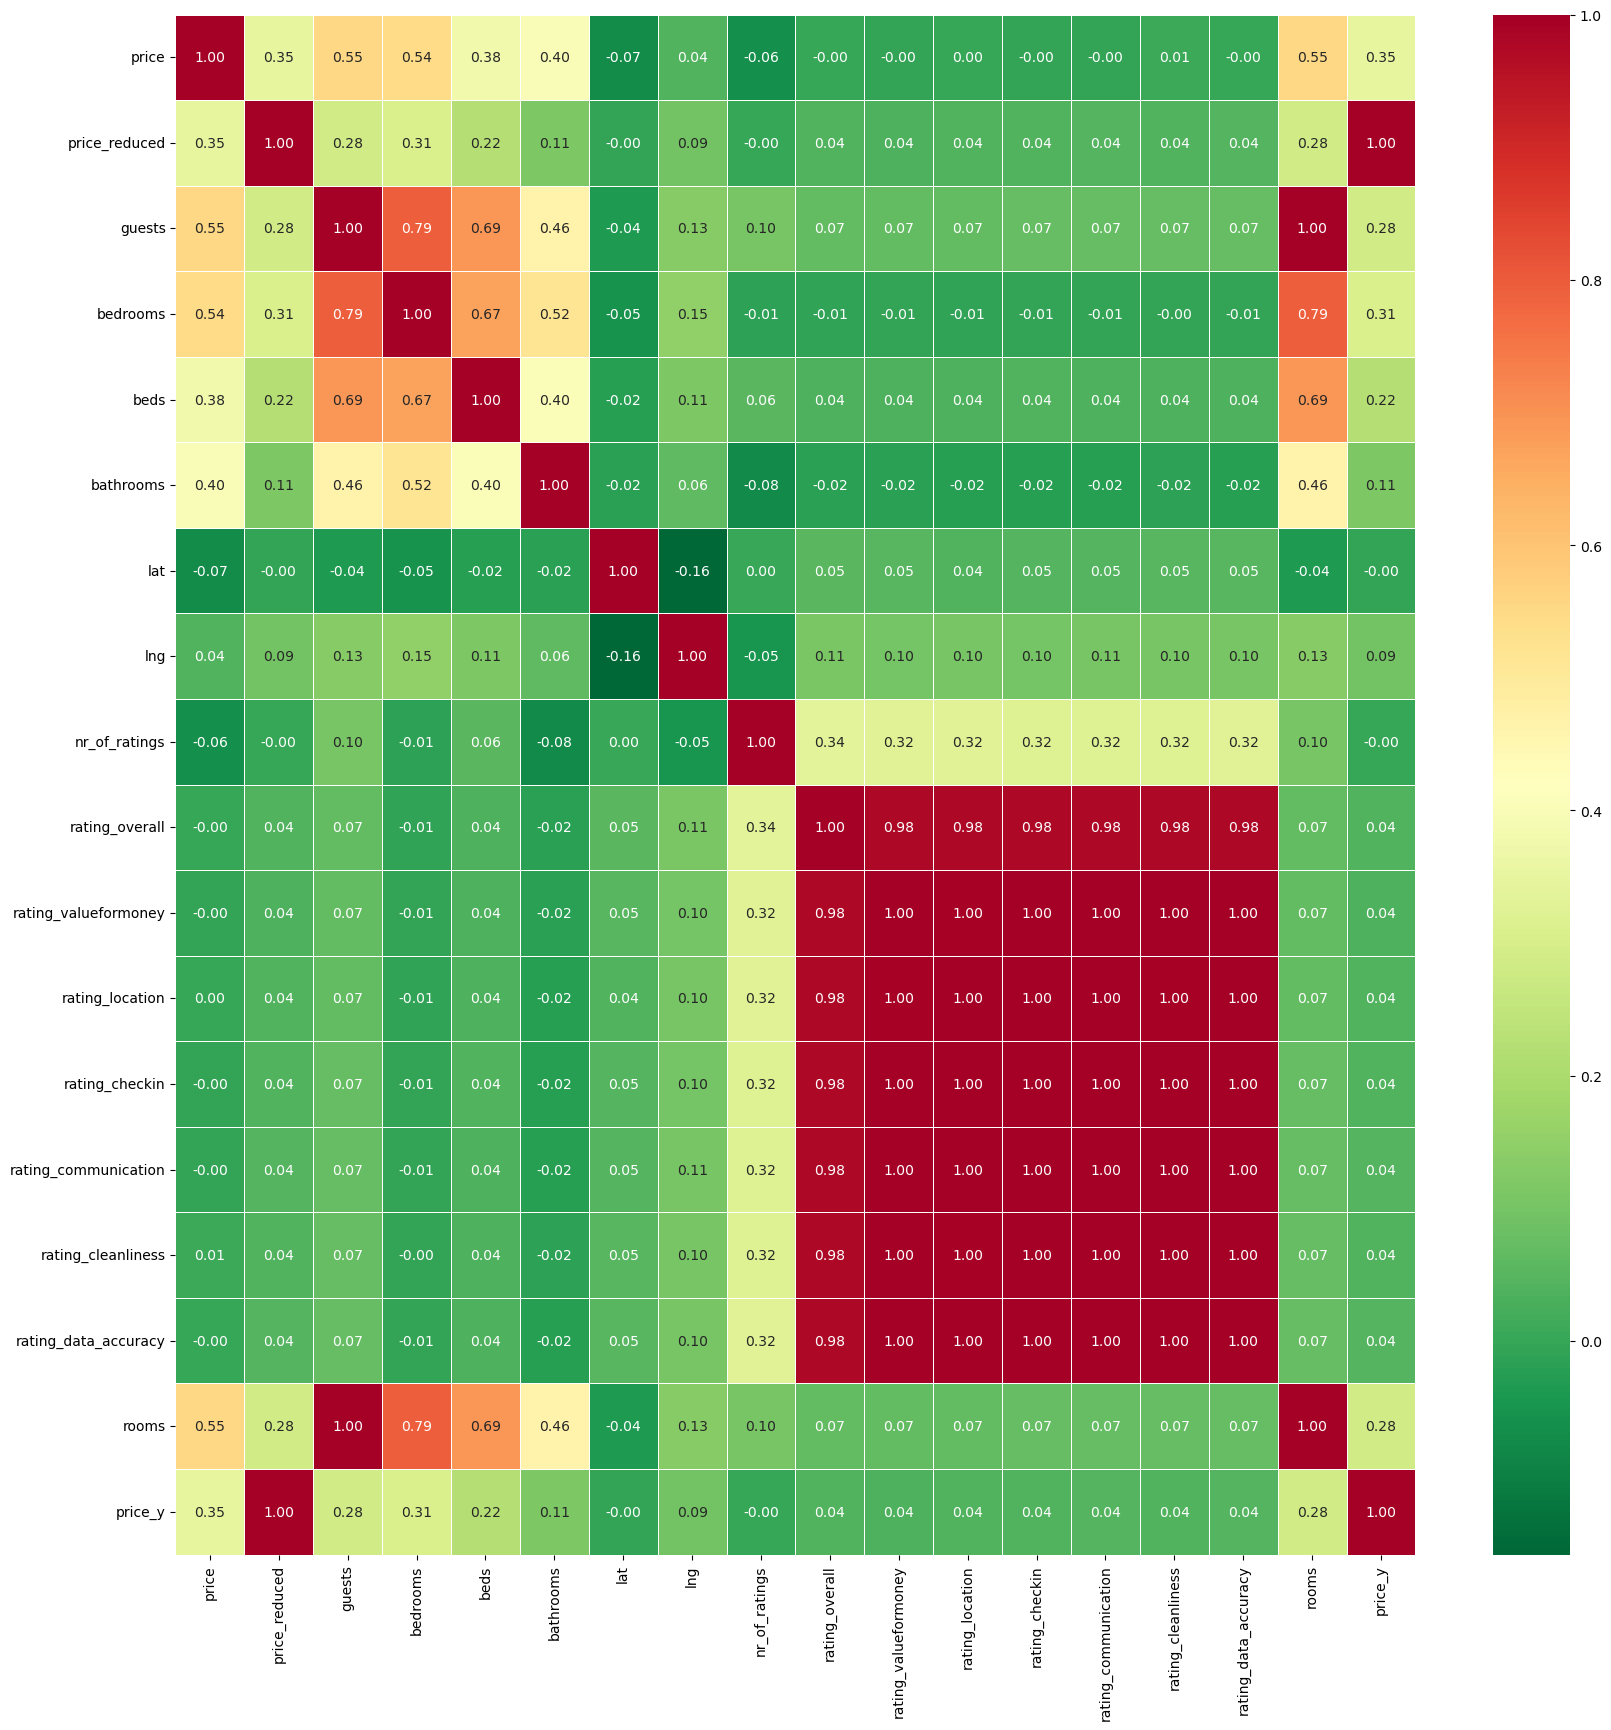

In [455]:
#plot correlation heatmap
plt.subplots(figsize=(20, 20))
heatmap = sns.heatmap(airbnb.corr(), annot=True, cmap='RdYlGn_r', linewidths=0.5, fmt='.2f')
heatmap = heatmap.get_figure()
heatmap.savefig("plots\\corr.png")

# Pairplots

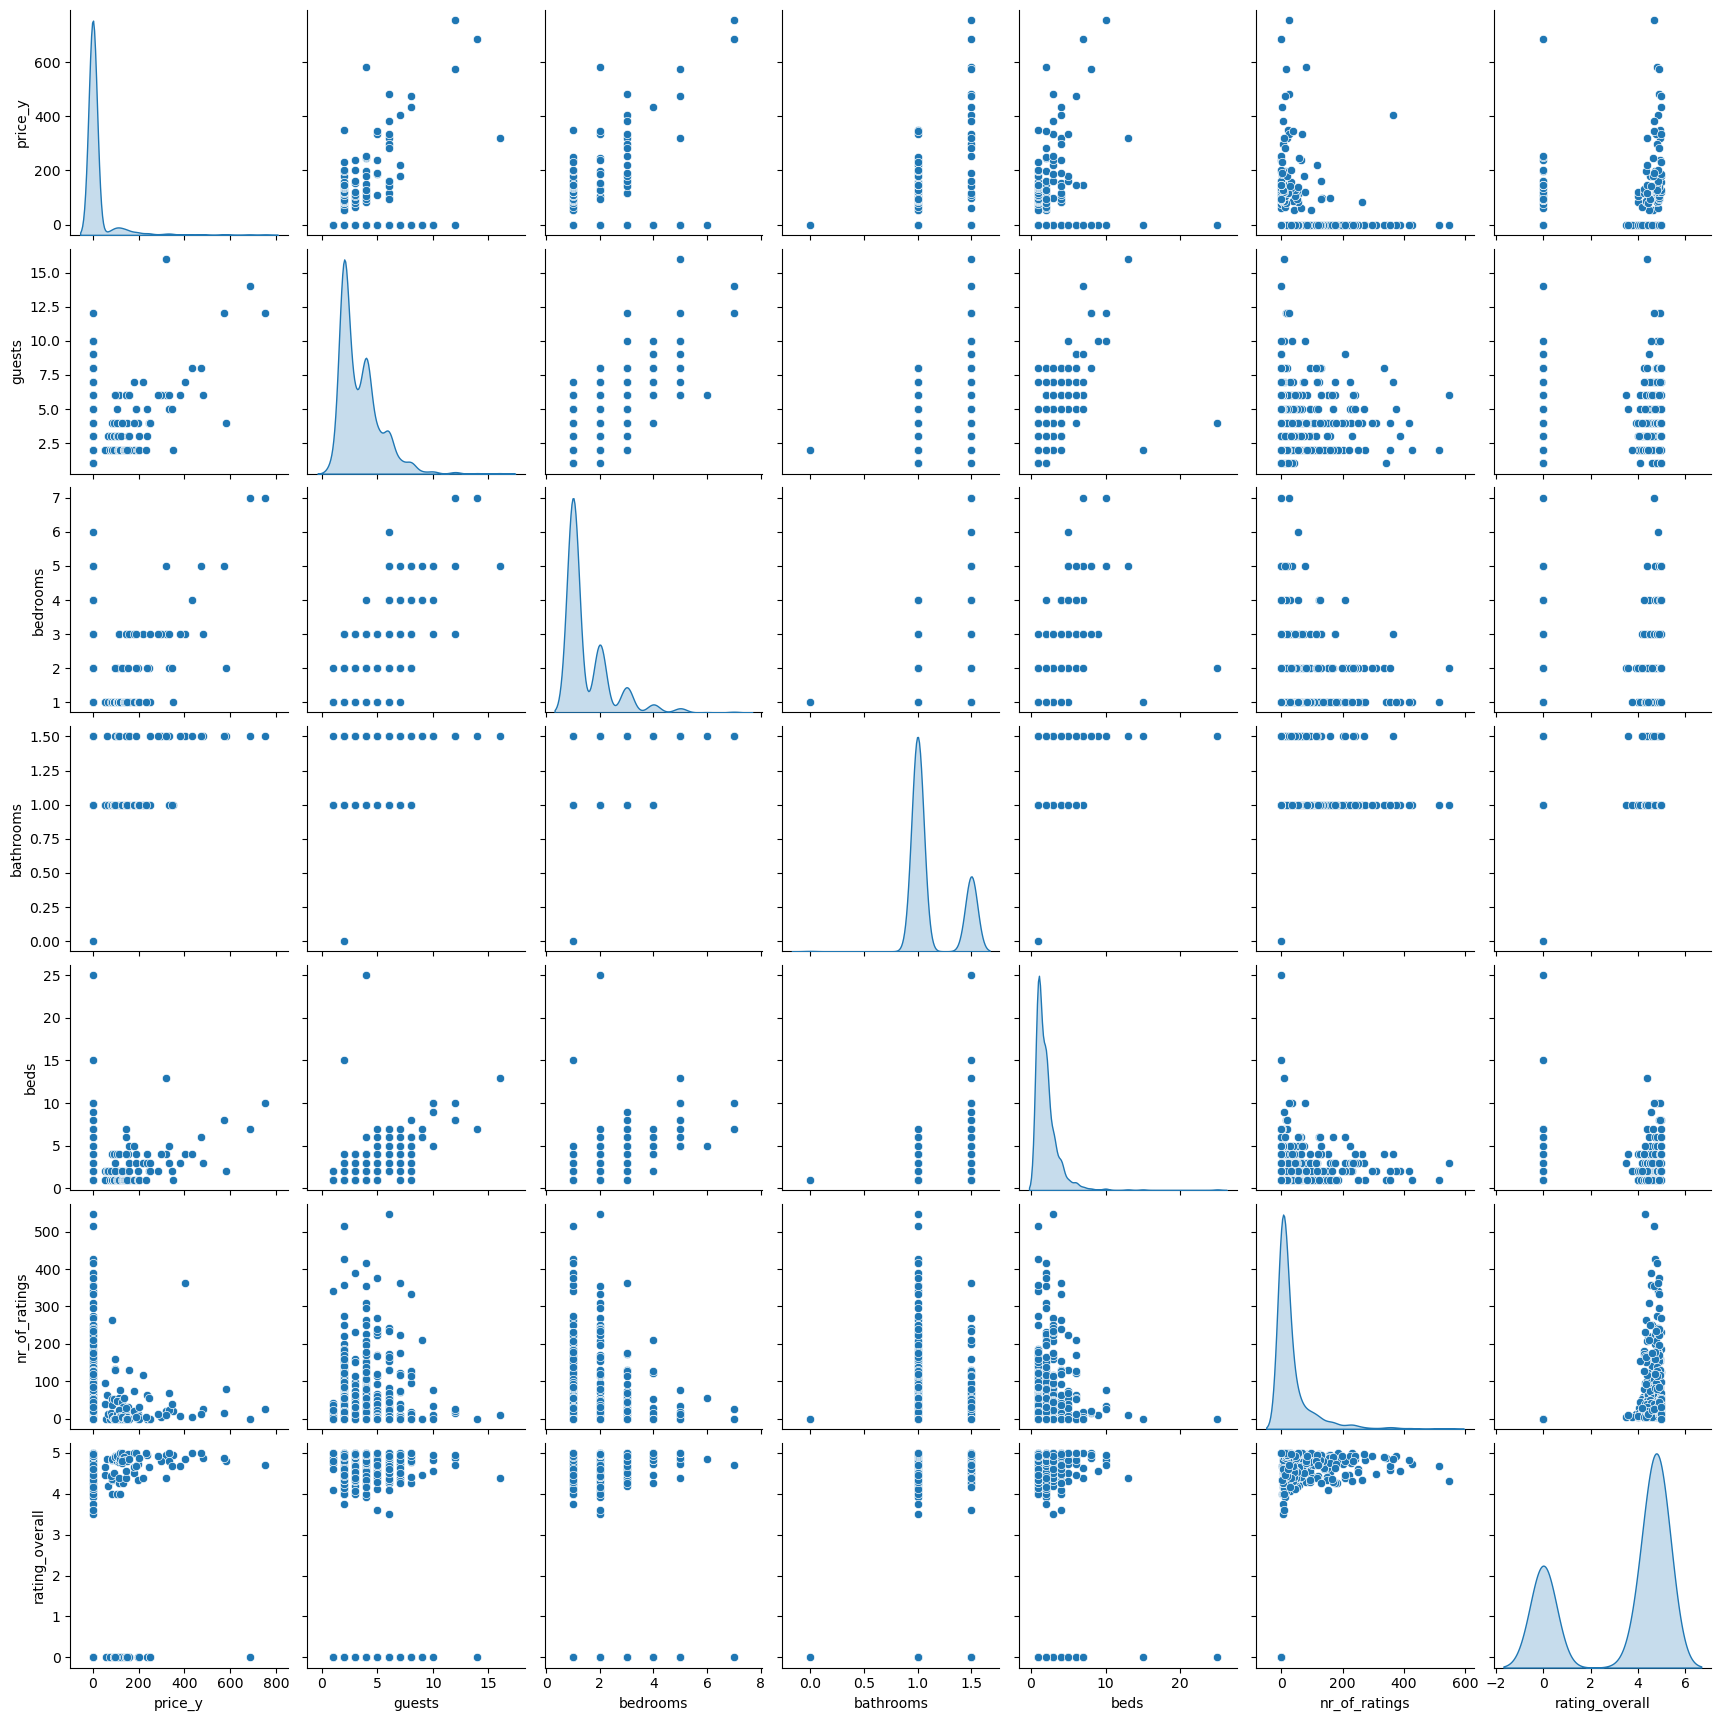

In [456]:
# Scatter
#sns pair plot to see relation between variables
#lets have a look at the distributions and the pairwise relations
numerical_cols = ['price_y','guests','bedrooms','bathrooms','beds','nr_of_ratings','rating_overall']
pairplot = sns.pairplot(airbnb.loc[:,numerical_cols],diag_kind='kde',kind = "scatter")

# Map longitude and latitude to districts in Zurich

In [457]:
districts = gpd.read_file("../data/stzh.adm_statistische_quartiere_map.json")

def get_district(longitude, latitude, districts, buffer=0.0001):
    point = Point(longitude, latitude)
    buffered_point = point.buffer(buffer)
    for _, row in districts.iterrows():
        if buffered_point.intersects(row['geometry']):
            return row['qname']
    return None

airbnb['district'] = airbnb.apply(lambda row: get_district(row['lng'], row['lat'], districts), axis=1)
airbnb.head()

,name,price,price_reduced,guests,bedrooms,beds,bathrooms,lat,lng,nr_of_ratings,...,rating_valueformoney,rating_location,rating_checkin,rating_communication,rating_cleanliness,rating_data_accuracy,comments,rooms,price_y,district
0,Serviced Studio Zürich City #B,44.0,0.0,2,1,1,1.0,47.40581,8.55173,36,...,0.0,0.0,0.0,0.0,0.0,0.0,['Zum Übernachten optimal für eine Person.\nFü...,2,0.0,Oerlikon
1,2.5 Zimmerwohnung mit Garten,40.0,0.0,2,1,1,1.0,47.36336,8.46183,0,...,0.0,0.0,0.0,0.0,0.0,0.0,[],2,0.0,None
2,Schönes Reihenhaus in Schlieren Altstiel.,48.0,0.0,1,1,1,1.0,47.39510,8.46870,10,...,4.7,4.4,4.7,4.6,4.0,4.6,"['Hallo zusammen,\nHerr Borotti hatte mich tro...",1,0.0,None
3,Stadt Zürich15/ kleines Studio,62.0,0.0,1,1,1,1.0,47.38157,8.48096,341,...,4.8,4.7,5.0,4.9,4.9,4.9,['Appartement war an super lage und das zimmer...,1,0.0,Altstetten
4,Affoltern a.A. Dachwohnung/ Attic apartement,60.0,0.0,3,1,2,1.0,47.27565,8.45244,160,...,4.6,4.7,4.9,4.8,4.3,4.8,"['Alles reibungslos gelaufen!', 'Die Wohnung i...",3,0.0,None


In [458]:
none_district_rows = airbnb[airbnb['district'].isnull()]
print(none_district_rows)

                                                  name  price  price_reduced  \
1                         2.5 Zimmerwohnung mit Garten   40.0            0.0   
2            Schönes Reihenhaus in Schlieren Altstiel.   48.0            0.0   
4         Affoltern a.A. Dachwohnung/ Attic apartement   60.0            0.0   
5                     1stFloor Apartment with Mattress   70.0            0.0   
7    Gemütliche Ferienwohnung bang im Zentrum von H...   59.0           53.0   
..                                                 ...    ...            ...   
950  Wunderschöne luxuriöse Wohnung an einem Zürichsee  589.0            0.0   
953  Maisonette-Wohnung mit 4 Schlafzimmern und See...  450.0            0.0   
954                         Wohlfühloase direkt bei ZH  450.0            0.0   
955           Tilia Appartementhaus (max. 14 Personen)  836.0          754.0   
956                        Haus mit dem gewissen Etwas  452.0            0.0   

     guests  bedrooms  beds  bathrooms 

In [459]:
# Create a base map centered around Zurich
m = folium.Map(location=[47.3769, 8.5417], zoom_start=12)

# Add the districts to the map
folium.GeoJson(districts).add_to(m)

# Select one of the problematic coordinates
problematic_lat = none_district_rows['lat'].iloc[1]
problematic_lng = none_district_rows['lng'].iloc[1]

# Add a marker for the problematic coordinate
folium.Marker([problematic_lat, problematic_lng]).add_to(m)

# Show the map
m

# Increase Buffer to avoid scrapping 244 of the data sets that are outside of the official districts

Unfortunately, 244 of coordinates are slightly outside of the official district data. Scrapping those data entries would reduce our total data set by almost a quarter. Therefore we try to increase the buffer so that those coordinates that are slightly off, can be allocated to a district.

In [472]:
airbnb['district'] = airbnb.apply(lambda row: get_district(row['lng'], row['lat'], districts), axis=1)
none_district_rows = airbnb[airbnb['district'].isnull()]
print(none_district_rows)

                                                  name  price  price_reduced  \
1                         2.5 Zimmerwohnung mit Garten   40.0            0.0   
2            Schönes Reihenhaus in Schlieren Altstiel.   48.0            0.0   
4         Affoltern a.A. Dachwohnung/ Attic apartement   60.0            0.0   
5                     1stFloor Apartment with Mattress   70.0            0.0   
7    Gemütliche Ferienwohnung bang im Zentrum von H...   59.0           53.0   
..                                                 ...    ...            ...   
950  Wunderschöne luxuriöse Wohnung an einem Zürichsee  589.0            0.0   
953  Maisonette-Wohnung mit 4 Schlafzimmern und See...  450.0            0.0   
954                         Wohlfühloase direkt bei ZH  450.0            0.0   
955           Tilia Appartementhaus (max. 14 Personen)  836.0          754.0   
956                        Haus mit dem gewissen Etwas  452.0            0.0   

     guests  bedrooms  beds  bathrooms 

## A buffer size of 0.292 would be needed, which is huge. The following map illustrates this buffer zone visually.

In [471]:
# Create a base map centered around Zurich
m = folium.Map(location=[47.3769, 8.5417], zoom_start=12)

# Add the districts to the map
folium.GeoJson(districts).add_to(m)

# Select one of the problematic coordinates
problematic_lat = none_district_rows['lat'].iloc[1]
problematic_lng = none_district_rows['lng'].iloc[1]

# Add a marker for the problematic coordinate
folium.Marker([problematic_lat, problematic_lng]).add_to(m)

# Define the buffer size
buffer_size = 0.008

# Create a buffer around the problematic coordinate
point = Point(problematic_lng, problematic_lat)
buffered_point = point.buffer(buffer_size)

# Add the buffer to the map
folium.GeoJson(buffered_point, style_function=lambda x: {"color": "red", "fillOpacity": 0.1}).add_to(m)

# Show the map
m

# Mapping all coordinates which could not be mapped to the official districts to find the outliers

In [468]:
airbnb['district'] = airbnb.apply(lambda row: get_district(row['lng'], row['lat'], districts), axis=1)
none_district_rows = airbnb[airbnb['district'].isnull()]

# Create a base map centered around Zurich
m = folium.Map(location=[47.3769, 8.5417], zoom_start=12)

# Add the districts to the map
folium.GeoJson(districts).add_to(m)

# Iterate through the rows with 'None' district values and add markers to the map
for _, row in none_district_rows.iterrows():
    lat = row['lat']
    lng = row['lng']
    folium.Marker([lat, lng], icon=folium.Icon(color="red", prefix="fa", icon="circle")).add_to(m)

# Show the map
m

# Increasing the buffer to 0.008 to keep some of the coordinates that are quite near to the official districts

In [473]:
airbnb['district'] = airbnb.apply(lambda row: get_district(row['lng'], row['lat'], districts, 0.008), axis=1)
none_district_rows = airbnb[airbnb['district'].isnull()]
print(none_district_rows)

                                                  name  price  price_reduced  \
4         Affoltern a.A. Dachwohnung/ Attic apartement   60.0            0.0   
5                     1stFloor Apartment with Mattress   70.0            0.0   
7    Gemütliche Ferienwohnung bang im Zentrum von H...   59.0           53.0   
9                          Wil ZH Zuhause mit Aussicht   62.0            0.0   
12                                      Schöne Wohnung   70.0            0.0   
..                                                 ...    ...            ...   
950  Wunderschöne luxuriöse Wohnung an einem Zürichsee  589.0            0.0   
953  Maisonette-Wohnung mit 4 Schlafzimmern und See...  450.0            0.0   
954                         Wohlfühloase direkt bei ZH  450.0            0.0   
955           Tilia Appartementhaus (max. 14 Personen)  836.0          754.0   
956                        Haus mit dem gewissen Etwas  452.0            0.0   

     guests  bedrooms  beds  bathrooms 

# Remove all the flats that can not be mapped to a district

In [476]:
airbnb = airbnb[airbnb['district'].notnull()]
none_district_rows = airbnb[airbnb['district'].isnull()]
print(none_district_rows)

Empty DataFrame
Columns: [name, price, price_reduced, guests, bedrooms, beds, bathrooms, lat, lng, nr_of_ratings, rating_overall, rating_valueformoney, rating_location, rating_checkin, rating_communication, rating_cleanliness, rating_data_accuracy, comments, rooms, price_y, district]
Index: []

[0 rows x 21 columns]


In [477]:
airbnb.count()

name                    716
price                   716
price_reduced           716
guests                  716
bedrooms                716
beds                    716
bathrooms               716
lat                     716
lng                     716
nr_of_ratings           716
rating_overall          716
rating_valueformoney    716
rating_location         716
rating_checkin          716
rating_communication    716
rating_cleanliness      716
rating_data_accuracy    716
comments                716
rooms                   716
price_y                 716
district                716
dtype: int64